In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

In [40]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,27.457627,1.050847,0.016949,0.0,0.016949,0.016949,0.067797,0.186441,0.118644,0.152542
std,8.090697,0.289097,0.130189,0.0,0.130189,0.130189,0.253555,0.392805,0.326145,0.362632
min,15.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.500000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.000000,3.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Biểu đồ dữ liệu thiếu ban đầu')

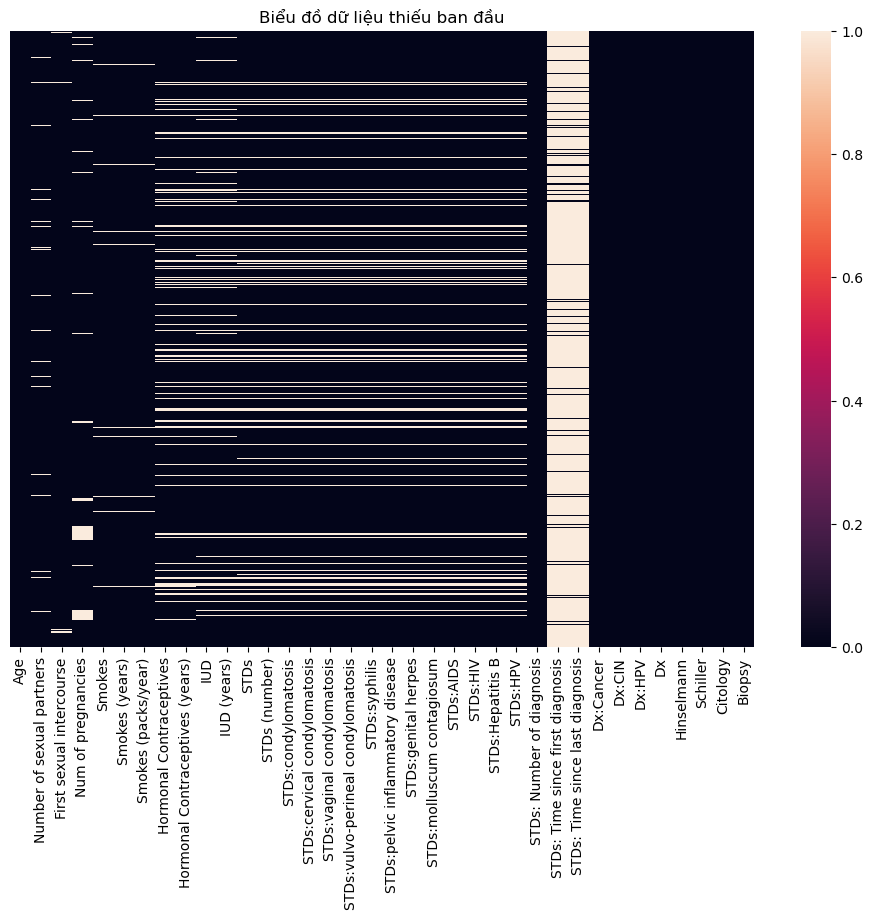

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load lại dữ liệu gốc
df_raw = pd.read_csv("risk_factors_cervical_cancer.csv")  # hoặc tên file gốc của bạn

# Thay thế dấu '?' thành NaN nếu có
df_raw.replace('?', pd.NA, inplace=True)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.isnull(), yticklabels=False)
plt.title("Biểu đồ dữ liệu thiếu ban đầu")



In [45]:
df = df.apply(pd.to_numeric, errors = 'coerce')
df.fillna(df.mean(), inplace = True)

<Axes: >

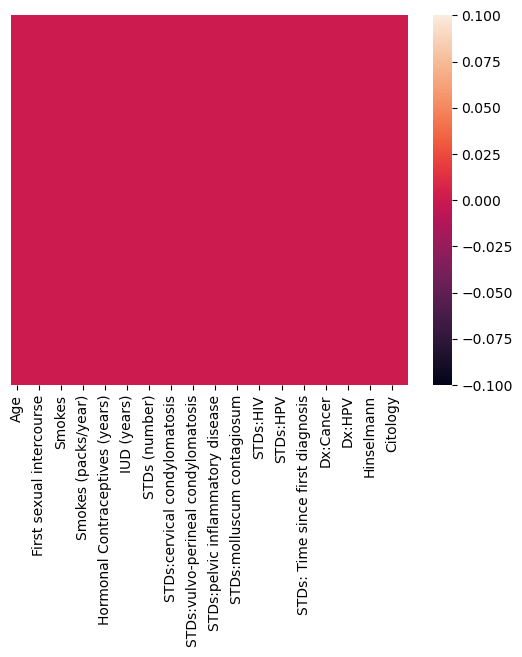

In [49]:
sns.heatmap(df.isnull(), yticklabels = False)

In [8]:
X =df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [9]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
21,41,3.0,17.0,4.0,0.0,0.0,0.0,1.0,10.00,0.0,...,21.0,21.0,0,0,0,0,0,0,0,0
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,...,2.0,2.0,0,0,0,0,0,1,1,1
59,35,3.0,17.0,4.0,0.0,0.0,0.0,1.0,7.00,1.0,...,19.0,19.0,0,0,0,0,0,0,0,0
68,35,3.0,20.0,2.0,0.0,0.0,0.0,0.0,0.00,1.0,...,3.0,3.0,0,0,0,0,0,0,0,0
78,35,3.0,17.0,6.0,1.0,13.0,2.6,1.0,7.00,0.0,...,12.0,12.0,0,0,0,0,0,1,0,0


In [21]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,27.457627,2.711864,17.050847,2.525424,0.271186,2.314135,0.694292,0.59322,1.948983,0.152542,...,6.101695,6.016949,0.016949,0.0,0.016949,0.016949,0.067797,0.186441,0.118644,0.152542
std,8.090697,1.426967,2.944450,1.454552,0.448388,4.736601,1.603797,0.49545,2.996554,0.362632,...,6.016342,6.061443,0.130189,0.0,0.130189,0.130189,0.253555,0.392805,0.326145,0.362632
min,15.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,1.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,3.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.250000,0.000000,...,4.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.500000,3.000000,19.000000,3.500000,1.000000,1.266973,0.125000,1.00000,3.000000,0.000000,...,8.000000,8.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.000000,7.000000,28.000000,6.000000,1.000000,16.000000,7.000000,1.00000,12.000000,1.000000,...,22.000000,22.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, stratify=y)

In [54]:
def evaluate_model(model, X, y, k=10):
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=0))

    print("=== Evaluation Results ===")
    print(f"Accuracy :  {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"F1-score :  {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"Precision:  {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    print(f"Recall   :  {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    

1.  Accuracy (Độ chính xác tổng thể)
    Accuracy là tỷ lệ số mẫu mà mô hình dự đoán đúng trên tổng số mẫu.
📎 Ví dụ: nếu có 100 người, mô hình dự đoán đúng 90 người → Accuracy = 90%.

2. Precision (Độ chính xác của dự đoán dương tính)
    Precision đo lường xem trong các lần mô hình dự đoán là “có bệnh”, thì bao nhiêu phần trăm là đúng.
🧠 Ví dụ: Nếu mô hình nói 10 người “có bệnh” mà chỉ 6 người thật sự mắc bệnh → Precision = 0.6.

3. Recall (Độ bao phủ ca thật sự dương tính)
Recall đo lường xem mô hình bắt được bao nhiêu phần trăm số ca thật sự mắc bệnh.
🧠 Ví dụ: Có 10 người thật sự mắc bệnh, mô hình chỉ bắt được 6 người → Recall = 0.6.
 
4. F1-score (Điểm cân bằng giữa Precision và Recall)
 F1-score là trung bình điều hòa của Precision và Recall.
Nó cân bằng giữa việc dự đoán đúng ca bệnh và không bỏ sót ca bệnh.
🧠 Nếu Precision = 1 và Recall = 0, thì F1 = 0 (nghĩa là mất cân bằng → không tốt).

In [55]:
#Logistic regression model
model = LogisticRegression(max_iter=1000)
evaluate_model(model, X, y)

=== Evaluation Results ===
Accuracy :  0.8333 ± 0.1972
F1-score :  0.1667 ± 0.3416
Precision:  0.2000 ± 0.4000
Recall   :  0.1500 ± 0.3202


| Metric    | Mean   | Std.Dev (±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.8333 | ± 0.1972    |
| F1-score  | 0.1667 | ± 0.3416    |
| Precision | 0.2000 | ± 0.4000    |
| Recall    | 0.1500 | ± 0.3202    |



Mô hình Logistic Regression có độ chính xác tổng thể tương đối ổn.

Tuy nhiên, khả năng phát hiện ca dương tính (Recall) và cân bằng Precision/Recall (F1-score) vẫn còn rất thấp.

Điều này cho thấy Logistic Regression chưa phù hợp với bài toán dữ liệu mất cân bằng như hiện tại.



In [34]:
# Descision tree model
tree_model = DecisionTreeClassifier(random_state=42)
evaluate_model(tree_model, X, y)

Accuracy :  0.9167 ± 0.1118
F1-score :  0.5167 ± 0.4500
Precision:  0.5000 ± 0.4472
Recall   :  0.5500 ± 0.4717


| Metric    | Mean   | Std.Dev (±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.9167 | ± 0.1118    |
| F1-score  | 0.5167 | ± 0.4500    |
| Precision | 0.5000 | ± 0.4472    |
| Recall    | 0.5500 | ± 0.4717    |



Mô hình Decision Tree cho kết quả tốt trên nhiều mặt, đặc biệt là khả năng phát hiện ca mắc bệnh (Recall).

F1-score cao cũng cho thấy mô hình cân bằng tốt giữa Precision và Recall.

Đây là lựa chọn phù hợp hơn khi đánh giá mô hình cho dữ liệu y tế nhạy cảm.



In [51]:
#Random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

evaluate_model(rf_model, X, y)

Accuracy :  0.8633 ± 0.1016
F1-score :  0.1167 ± 0.2363
Precision:  0.1500 ± 0.3202
Recall   :  0.1000 ± 0.2000


| Metric    | Mean   | Std.Dev (±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.8633 | ± 0.1016    |
| F1-score  | 0.1167 | ± 0.2363    |
| Precision | 0.1500 | ± 0.3202    |
| Recall    | 0.1000 | ± 0.2000    |



Mặc dù Accuracy đạt mức khá cao (~86%), nhưng các chỉ số như F1-score, Precision, và đặc biệt là Recall đều rất thấp.

Điều này cho thấy mô hình thiên lệch về lớp âm tính (không bệnh) — khả năng phát hiện ca bệnh còn kém.

Không nên chỉ dựa vào Accuracy để đánh giá mô hình trong bài toán y tế có dữ liệu mất cân bằng.